In [2]:

import os
import json
import glob
import copy
import numpy as np
import pylab as pl
import seaborn as sns
import pandas as pd


from scipy import stats as spstats

from pipeline.python.classifications import experiment_classes as util
from pipeline.python.utils import natural_keys, label_figure

/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/2p-pipeline/pipeline/python/classifications/experiment_classes.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/traitlets/config/applica

/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/2p-pipeline/pipeline/python/rois/utils.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in la

/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/2p-pipeline/pipeline/python/classifications/test_responsivity.py:10: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/traitlets/config/applicat

/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/2p-pipeline/pipeline/python/retinotopy/target_visual_field.py:19: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application

In [49]:
%matplotlib notebook

# Test 1 dataset

In [5]:
rootdir = '/n/coxfs01/2p-data'
animalid = 'JC084' #'JC059'
session = '20190522' #'20190227'
fov = 'FOV1_zoom2p0x' #'FOV4_zoom4p0x'
traceid = 'traces001' #'traces001'
response_type = 'dff'


# Set responsivity params

In [7]:
responsive_test = 'nstds'
responsive_thr = 10.
n_stds = 2.5


# Get aggregated data

In [9]:
from pipeline.python.classifications import get_dataset_stats as gd
import cPickle as pkl

options = ['-t', 'traces001']
optsE = gd.extract_options(options)

rootdir = optsE.rootdir
aggregate_dir = optsE.aggregate_dir
fov_type = optsE.fov_type
traceid = optsE.traceid
response_type = 'dff'
print aggregate_dir

/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/2p-pipeline/pipeline/python/classifications/get_dataset_stats.py:17: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to u'nbAgg' by the following code:
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_inst

/n/coxfs01/julianarhee/aggregate-visual-areas


/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/2p-pipeline/pipeline/python/classifications/utils.py:10: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to u'nbAgg' by the following code:
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app

In [10]:
sdata_fpath = os.path.join(aggregate_dir, 'dataset_info.pkl')
if os.path.exists(sdata_fpath):
    with open(sdata_fpath, 'rb') as f:
        sdata = pkl.load(f)
else:
    sdata = gd.aggregate_session_info(traceid=optsE.traceid, trace_type=optsE.trace_type, 
                                       state=optsE.state, fov_type=optsE.fov_type, 
                                       visual_areas=optsE.visual_areas,
                                       blacklist=optsE.blacklist, 
                                       rootdir=optsE.rootdir)
    with open(sdata_fpath, 'wb') as f:
        pkl.dump(sdata, f, protocol=pkl.HIGHEST_PROTOCOL)
dsets = sdata[sdata['experiment']=='blobs']

In [11]:
stats_desc = util.get_stats_desc(traceid=optsE.traceid,
                                      trace_type= optsE.trace_type,
                                      response_type = response_type,
                                      responsive_test = responsive_test,
                                      responsive_thr = responsive_thr,
                                      n_stds = n_stds)
print(stats_desc)

stats-traces001-corrected-dff-nstds-thr-10.00


# Create output dir for classification

In [72]:
outdir = os.path.join(aggregate_dir, 'blob-classification', stats_desc)
if not os.path.exists(outdir):
    os.makedirs(outdir)
print(outdir)

/n/coxfs01/julianarhee/aggregate-visual-areas/blob-classification/stats-traces001-corrected-dff-nstds-thr-10.00


In [16]:
def reformat_morph_values(sdf):
    control_ixs = sdf[sdf['morphlevel']==-1].index.tolist()
    sizevals = np.array([round(s, 1) for s in sdf['size'].unique() if s not in ['None', None] and not np.isnan(s)] )
    sdf.loc[sdf.morphlevel==-1, 'size'] = pd.Series(sizevals, index=control_ixs)
    sdf['size'] = [round(s, 1) for s in sdf['size'].values]

    return sdf


In [17]:
# Set plotting params
threshold_dff = True
min_dff = 0.03
cmap = 'inferno'
n_sz = 5
n_mp = 10

tune_name='morph'

incorrect_nvalues = []


In [18]:
data_id = '|'.join([animalid, session, fov, traceid, stats_desc])

exp = util.Objects(animalid, session, fov, traceid=traceid, rootdir=rootdir)
# Get stimulus conditions
sdf = exp.get_stimuli()
sdf = reformat_morph_values(sdf)
sizes = np.array(sorted(sdf['size'].unique()))
morphs = np.array(sorted(sdf['morphlevel'].unique()))

n_sizes = len(sdf['size'].unique())
n_morphs = len(sdf['morphlevel'].unique()) 
if n_sizes != n_sz or n_morphs != n_mp:
    incorrect_nvalues.append(skey)
    pass

rstats, rlist, _ = util.get_roi_stats(animalid, session, fov, exp_name=exp.name,
                             response_type=response_type, responsive_test=responsive_test,
                             responsive_thr=responsive_thr, n_stds=n_stds)
rstats = rstats['nframes_above']

# Get metrics for each condition
estats = exp.get_stats(responsive_test=responsive_test, responsive_thr=responsive_thr, n_stds=n_stds)
meanr = pd.concat([pd.Series(estats.gdf.get_group(roi).groupby(['config']).mean()['dff'], name=roi) \
                   for roi in estats.rois], axis=1).T

# Get ROI list
if threshold_dff:
    rois_plot = meanr[(meanr.max(axis=1) > min_dff)].index.tolist()
else:
    rois_plot = meanr.index.tolist()
print("Plotting %i of %i responsive cells." % (len(rois_plot), len(meanr.index.tolist())))

stimdf = sdf[sdf['morphlevel'] != -1]

... [JC084|20190522|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array


/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/2p-pipeline/pipeline/python/classifications/experiment_classes.py:999: RuntimeWarning: invalid value encountered in divide
  F0 = np.nanmean(dset['corrected'][:] / dset['dff'][:] )


... offset: 608.72
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')


In [53]:
sample_data = pd.concat([pd.DataFrame(roidf[response_type].values, columns=[roi],
                                      index=roidf['config']) for roi, roidf in estats.gdf], axis=1)
sample_data = sample_data[rois_plot]
sample_labels = np.array(sample_data.index.tolist())


In [56]:
sample_labels = np.array(sample_data.index.tolist())


In [57]:
tested_sizes = sorted(sdf['size'].unique())
tested_morphs = sorted(sdf['morphlevel'].unique())

In [46]:

import scipy.stats as spstats
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


In [73]:
if not os.path.exists(os.path.join(outdir, 'sessions')):
    os.makedirs(os.path.join(outdir, 'sessions'))
print(os.path.join(outdir, 'sessions'))

/n/coxfs01/julianarhee/aggregate-visual-areas/blob-classification/stats-traces001-corrected-dff-nstds-thr-10.00/sessions


In [82]:
visual_area = 'Li'
sessions = dsets[ dsets['visual_area'] == visual_area ]

n_datasets = sessions.shape[0]

<IPython.core.display.Javascript object>


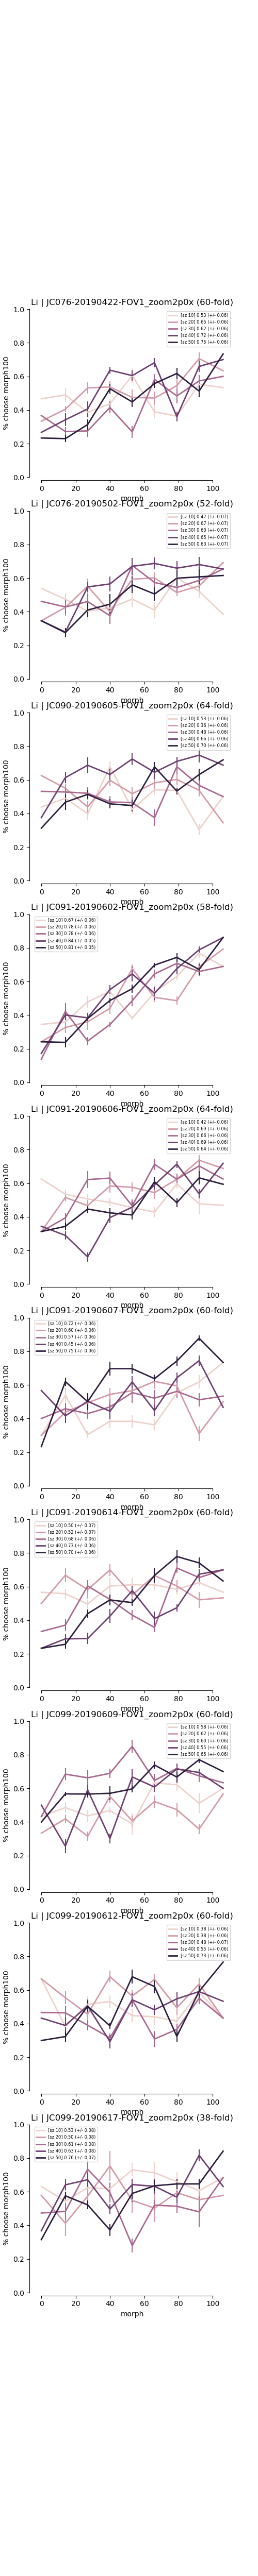

<IPython.core.display.Javascript object>


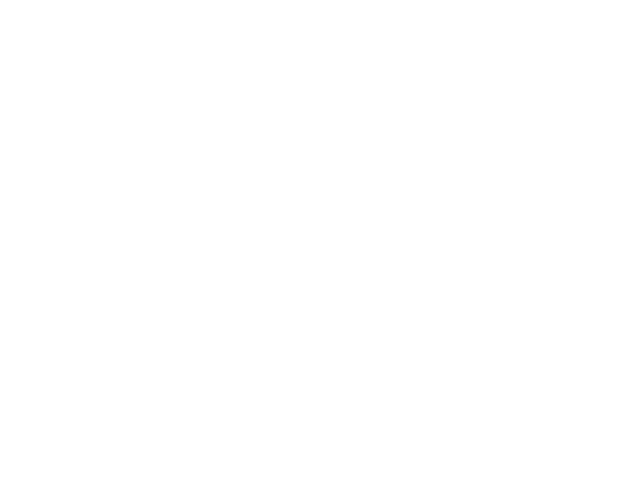

... [JC076|20190422|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 581.51
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 168 of 228 responsive cells.
mean score: 0.53 (+/- 0.06)
mean score: 0.65 (+/- 0.06)
mean score: 0.62 (+/- 0.06)
mean score: 0.72 (+/- 0.06)
mean score: 0.75 (+/- 0.06)
Li_JC076-20190422-FOV1_zoom2p0x_AvsB-linearSVM-LOO


<IPython.core.display.Javascript object>


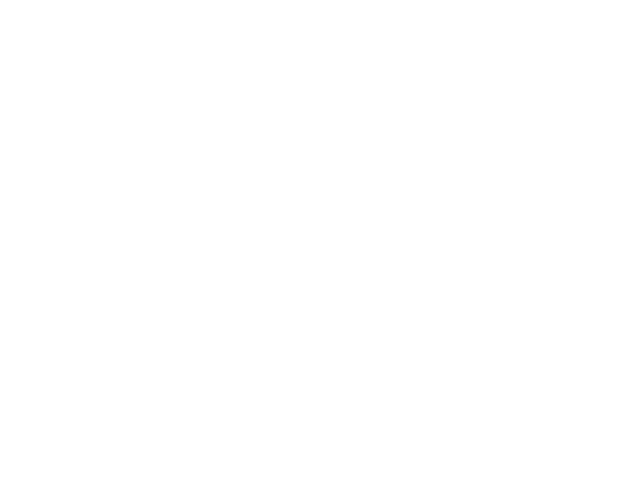

... [JC076|20190502|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 498.37
... adjusting for equal reps / condn...
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 127 of 148 responsive cells.
mean score: 0.42 (+/- 0.07)
mean score: 0.67 (+/- 0.07)
mean score: 0.60 (+/- 0.07)
mean score: 0.65 (+/- 0.07)
mean score: 0.63 (+/- 0.07)
Li_JC076-20190502-FOV1_zoom2p0x_AvsB-linearSVM-LOO


<IPython.core.display.Javascript object>


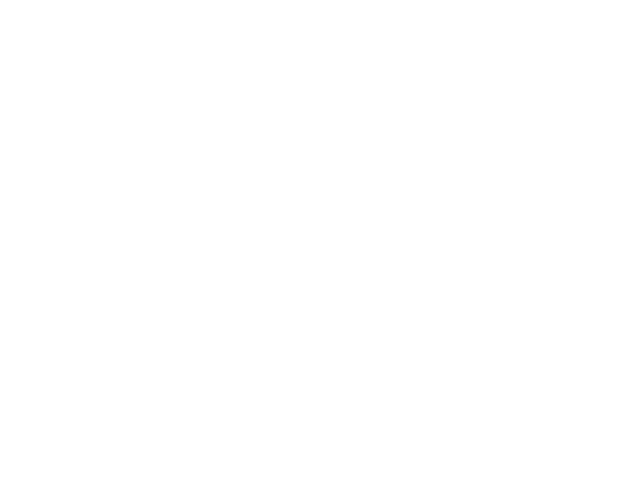

... [JC090|20190605|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 385.58
... adjusting for equal reps / condn...
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 142 of 161 responsive cells.
mean score: 0.53 (+/- 0.06)
mean score: 0.36 (+/- 0.06)
mean score: 0.48 (+/- 0.06)
mean score: 0.66 (+/- 0.06)
mean score: 0.70 (+/- 0.06)
Li_JC090-20190605-FOV1_zoom2p0x_AvsB-linearSVM-LOO


<IPython.core.display.Javascript object>


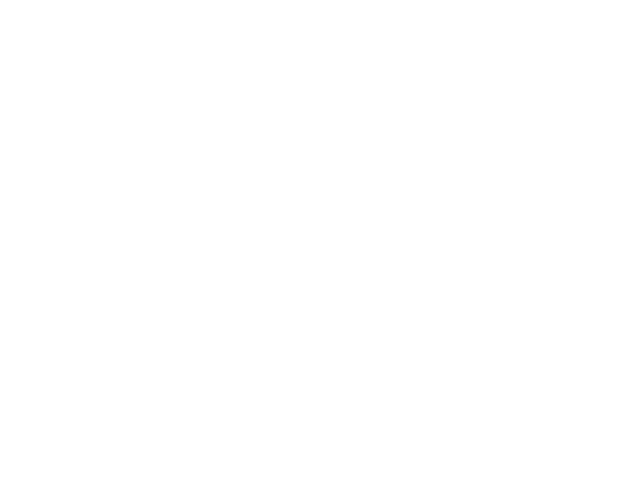

... [JC091|20190602|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 335.66
... adjusting for equal reps / condn...
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 232 of 284 responsive cells.
mean score: 0.67 (+/- 0.06)
mean score: 0.78 (+/- 0.06)
mean score: 0.78 (+/- 0.06)
mean score: 0.84 (+/- 0.05)
mean score: 0.81 (+/- 0.05)
Li_JC091-20190602-FOV1_zoom2p0x_AvsB-linearSVM-LOO


<IPython.core.display.Javascript object>


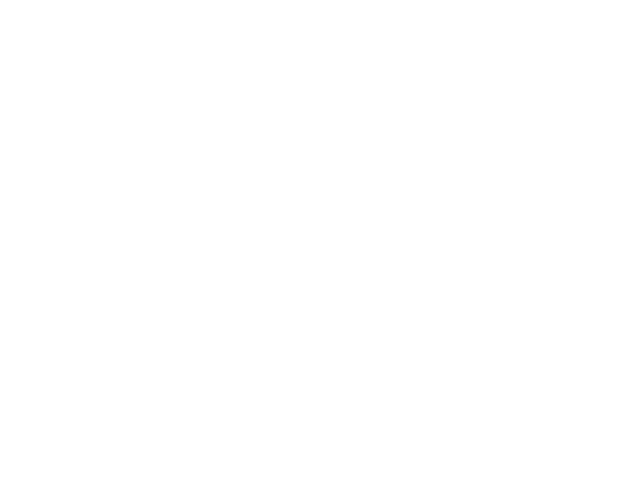

... [JC091|20190606|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 515.58
... adjusting for equal reps / condn...
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 114 of 134 responsive cells.
mean score: 0.42 (+/- 0.06)
mean score: 0.69 (+/- 0.06)
mean score: 0.66 (+/- 0.06)
mean score: 0.69 (+/- 0.06)
mean score: 0.64 (+/- 0.06)
Li_JC091-20190606-FOV1_zoom2p0x_AvsB-linearSVM-LOO


<IPython.core.display.Javascript object>


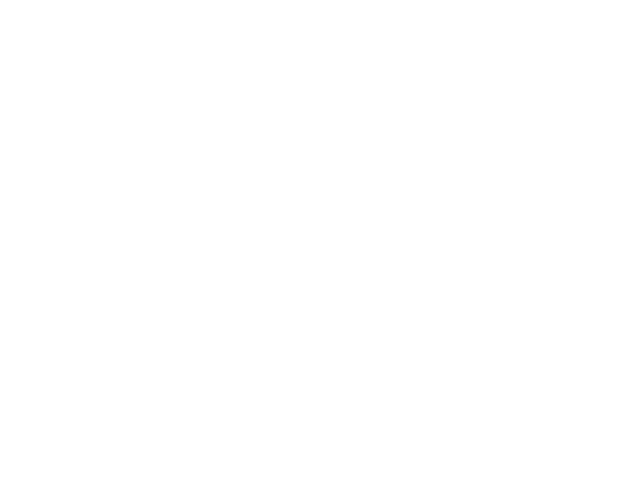

... [JC091|20190607|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 341.66
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 229 of 260 responsive cells.
mean score: 0.72 (+/- 0.06)
mean score: 0.60 (+/- 0.06)
mean score: 0.57 (+/- 0.06)
mean score: 0.45 (+/- 0.06)
mean score: 0.75 (+/- 0.06)
Li_JC091-20190607-FOV1_zoom2p0x_AvsB-linearSVM-LOO


<IPython.core.display.Javascript object>


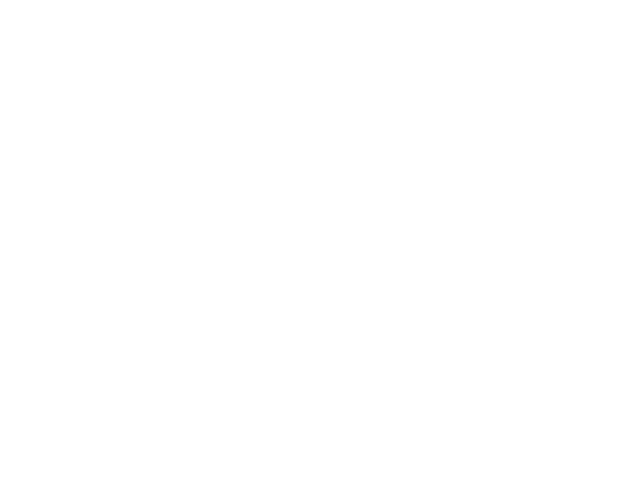

... [JC091|20190614|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 248.61
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 194 of 263 responsive cells.
mean score: 0.50 (+/- 0.07)
mean score: 0.52 (+/- 0.07)
mean score: 0.68 (+/- 0.06)
mean score: 0.73 (+/- 0.06)
mean score: 0.70 (+/- 0.06)
Li_JC091-20190614-FOV1_zoom2p0x_AvsB-linearSVM-LOO


<IPython.core.display.Javascript object>


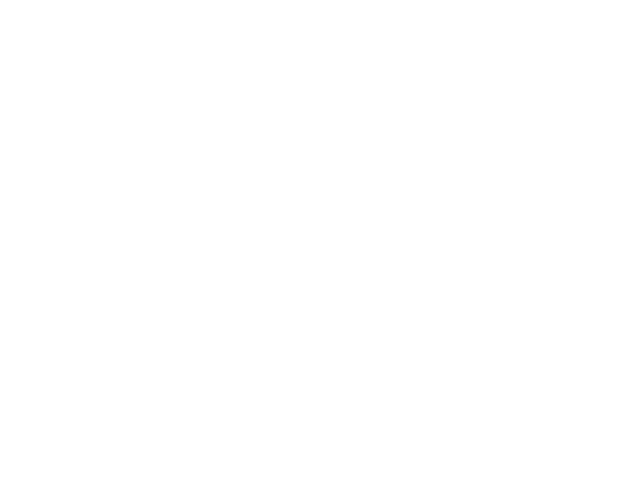

... [JC099|20190609|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 467.94
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 84 of 126 responsive cells.
mean score: 0.58 (+/- 0.06)
mean score: 0.62 (+/- 0.06)
mean score: 0.60 (+/- 0.06)
mean score: 0.55 (+/- 0.06)
mean score: 0.65 (+/- 0.06)
Li_JC099-20190609-FOV1_zoom2p0x_AvsB-linearSVM-LOO


<IPython.core.display.Javascript object>


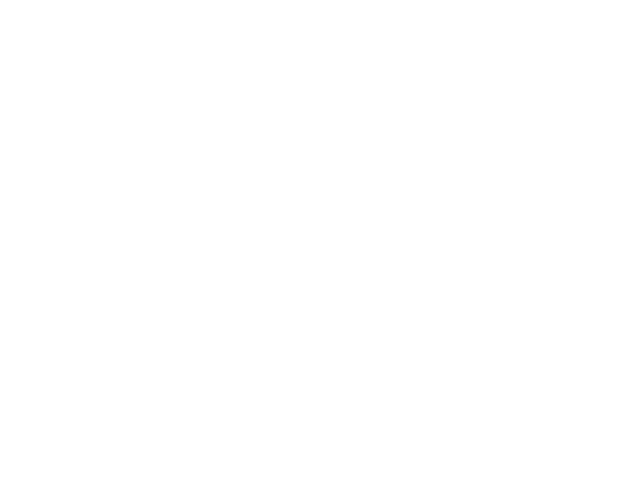

... [JC099|20190612|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 572.09
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 90 of 121 responsive cells.
mean score: 0.38 (+/- 0.06)
mean score: 0.38 (+/- 0.06)
mean score: 0.48 (+/- 0.07)
mean score: 0.55 (+/- 0.06)
mean score: 0.73 (+/- 0.06)
Li_JC099-20190612-FOV1_zoom2p0x_AvsB-linearSVM-LOO


<IPython.core.display.Javascript object>


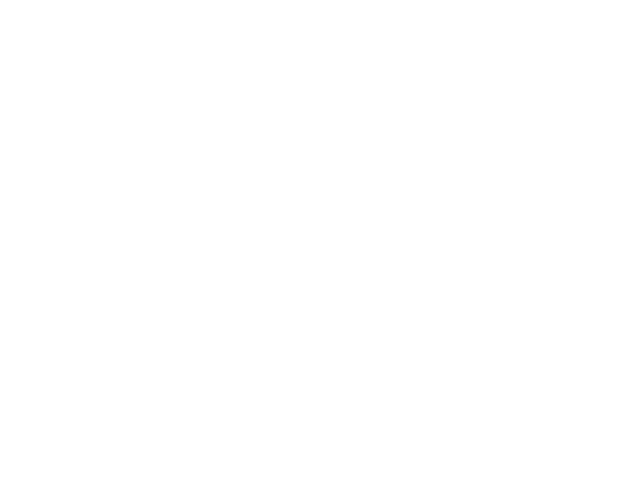

... [JC099|20190617|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 498.50
... adjusting for equal reps / condn...
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 21 of 22 responsive cells.
mean score: 0.53 (+/- 0.08)
mean score: 0.50 (+/- 0.08)
mean score: 0.61 (+/- 0.08)
mean score: 0.63 (+/- 0.08)
mean score: 0.76 (+/- 0.07)
Li_JC099-20190617-FOV1_zoom2p0x_AvsB-linearSVM-LOO


In [83]:


f2, axes = pl.subplots(n_datasets, figsize=(5, n_datasets*5))
f2.patch.set_alpha(1)

ai = 0
#ai = 0
for (animalid, session, fov), g in sessions.groupby(['animalid', 'session', 'fov']):
    ax2 = axes[ai]
    
    fig, ax = pl.subplots()
    fig.patch.set_alpha(1)
    
    skey = '-'.join([animalid, session, fov])
    data_id = '|'.join([animalid, session, fov, traceid, stats_desc])

    exp = util.Objects(animalid, session, fov, traceid=traceid, rootdir=rootdir)
    # Get stimulus conditions
    sdf = exp.get_stimuli()
    sdf = reformat_morph_values(sdf)
    sizes = np.array(sorted(sdf['size'].unique()))
    morphs = np.array(sorted(sdf['morphlevel'].unique()))

    n_sizes = len(sdf['size'].unique())
    n_morphs = len(sdf['morphlevel'].unique()) 
    if n_sizes != n_sz or n_morphs != n_mp:
        incorrect_nvalues.append(skey)
        pass

    rstats, rlist, _ = util.get_roi_stats(animalid, session, fov, exp_name=exp.name,
                                 response_type=response_type, responsive_test=responsive_test,
                                 responsive_thr=responsive_thr, n_stds=n_stds)
    rstats = rstats['nframes_above']

    # Get metrics for each condition
    estats = exp.get_stats(responsive_test=responsive_test, responsive_thr=responsive_thr, n_stds=n_stds)
    meanr = pd.concat([pd.Series(estats.gdf.get_group(roi).groupby(['config']).mean()['dff'], name=roi) \
                       for roi in estats.rois], axis=1).T

    # Get ROI list
    if threshold_dff:
        rois_plot = meanr[(meanr.max(axis=1) > min_dff)].index.tolist()
    else:
        rois_plot = meanr.index.tolist()
    print("Plotting %i of %i responsive cells." % (len(rois_plot), len(meanr.index.tolist())))
    
    sample_data = pd.concat([pd.DataFrame(roidf[response_type].values, columns=[roi],
                                          index=roidf['config']) for roi, roidf in estats.gdf], axis=1)
    sample_data = sample_data[rois_plot]
    sample_labels = np.array(sample_data.index.tolist())


    stimdf = sdf[sdf['morphlevel'] != -1]

    #% Specify train/test conditions:     
    class_name = 'morphlevel'
    class_types = [0, 106]
    restrict_transform = True
    constant_transform = 'size'

    C = 1e3
    m0 = 0
    m100 = 106
    #fig, ax = pl.subplots()

    size_colors = sns.cubehelix_palette(len(tested_sizes))
    lw=2
    for curr_sz, curr_color in zip(tested_sizes, size_colors):
        
        if restrict_transform:
            constant_transform_val = curr_sz
            train_configs = stimdf[((stimdf[class_name].isin(class_types)) & (stimdf[constant_transform]==constant_transform_val))].index.tolist()
        else:
            train_configs = stimdf[stimdf[class_name].isin(class_types)].index.tolist()

        # Set train/test set:
        train_ixs = [i for i, l in enumerate(sample_labels) if l in train_configs]

        X = sample_data.iloc[train_ixs].values #[train_configs]
        y = np.array([stimdf[class_name][c] for c in sample_labels[train_ixs]])

        # Set validation set:
        untrained_class_types = [c for c in stimdf[class_name].unique() if c not in class_types]
        test_configs = stimdf[( (stimdf[constant_transform]==constant_transform_val) & (stimdf[class_name].isin(untrained_class_types)) )].index.tolist()
        test_ixs = [i for i, l in enumerate(sample_labels) if l in test_configs]
        X_test = sample_data.iloc[test_ixs].values
        y_test_labels = sample_labels[test_ixs]


        #% Train/test split
        n_splits = len(X)

        kf = KFold(n_splits=n_splits)
        kf.get_n_splits(X)

        scores=[]
        test_scores = dict((stimdf[class_name][tc], []) for tc in test_configs)
        choices = dict((tc, []) for tc in tested_morphs)

        for train_index, validate_index in kf.split(X):
            # Get current train/test split data:
            X_train, X_validate = X[train_index], X[validate_index]
            y_train, y_validate = y[train_index], y[validate_index]
            scaler = preprocessing.StandardScaler().fit(X_train)
            X_train_transformed = scaler.transform(X_train)

            # Fit SVM:
            trained_svc = LinearSVC(multi_class='ovr', C=C).fit(X_train_transformed, y_train)

            # Test:
            X_validate_transformed = scaler.transform(X_validate)
            curr_score = trained_svc.score(X_validate_transformed, y_validate)  
            y_pred = trained_svc.predict(X_validate_transformed)

            # Test 2:
            for true_val, pred_val in zip(y_validate, y_pred):
                choices[true_val].append(pred_val)

            for tc in test_configs:
                X_test_transformed = scaler.transform(X_test[np.where(y_test_labels==tc)[0], :])
                curr_score_test = trained_svc.score(X_test_transformed, [m100 for _ in range(X_test_transformed.shape[0])])  
                test_scores[stimdf[class_name][tc]].append(curr_score_test)
                y_pred_test = trained_svc.predict(X_test_transformed)

                choices[stimdf[class_name][tc]].append(y_pred_test)

            scores.append(curr_score)

        print("mean score: %.2f (+/- %.2f)" % (np.mean(scores), spstats.sem(scores)))
        #for k, v in sorted(test_scores.items(), key=lambda x: x[0]):
        #    print k, np.nanmean(v)

        #fig, ax = pl.subplots()
        pchoose100={}
        pchoose100_sem={}
        for k, v in choices.items():
            if k in [m0, m100]:
                pchoose100[k] = np.sum([i==m100 for i in v]) / float(len(v))
                pchoose100_sem[k] = 0
            else:
                pchoose100[k] = np.mean([np.sum([i==m100 for i in vv]) / float(len(vv)) for vv in v])
                pchoose100_sem[k] = np.std([np.sum([i==m100 for i in vv]) / float(len(vv)) for vv in v])


        curr_label = "[sz %i] %.2f (+/- %.2f)" % (curr_sz, np.mean(scores), spstats.sem(scores))
        for cax in [ax, ax2]:
            cax.plot(sorted(pchoose100.keys()), [pchoose100[k] for k in sorted(pchoose100.keys())], '-', \
                    markersize=.5, lw=lw, color=curr_color, label=curr_label)
            cax.errorbar(sorted(pchoose100.keys()), [pchoose100[k] for k in sorted(pchoose100.keys())],\
                        yerr=[pchoose100_sem[k] for k in sorted(pchoose100_sem.keys())], fmt='none',
                        ecolor=curr_color)

            cax.set_ylim([0, 1])
            cax.set_ylabel('% choose morph100')
            cax.set_xlabel('morph')
            cax.set_title('%s | %s (%i-fold)' % (visual_area, skey, n_splits))
            sns.despine(trim=True, offset=4, ax=cax)

    #pl.subplots_adjust(top=0.8)
    ax.legend(fontsize=6)
    ax2.legend(fontsize=6)

    pl.figure(fig.number)
    figname = '%s_%s_AvsB-linearSVM-LOO' % (visual_area, skey)
    pl.savefig(os.path.join(outdir, 'sessions', '%s.png' % figname))
    pl.close()
    ai += 1
    print figname

pl.figure(f2.number)
figname = '%s_AvsB-linearSVM-LOO_all-datasets' % (visual_area)
pl.savefig(os.path.join(outdir, '%s.png' % figname))


In [78]:
fig.gca()